### Working with Time Series Data Exercises 

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from vega_datasets import data

### SF Temps Data

In [2]:
df = data.sf_temps()

In [3]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    8759 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


In [4]:
df = df.set_index('date').sort_index()

In [5]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


---

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [6]:
day_mean_temp = df.resample('d').mean()
day_mean_temp.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


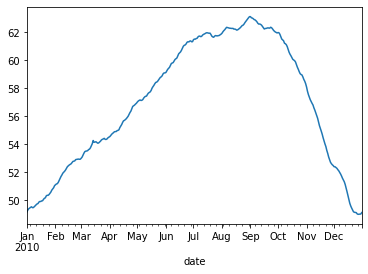

In [7]:
day_mean_temp.temp.plot()
plt.show()

---

2. Write the code necessary to visualize the minimum temperature over time.

In [8]:
day_min_temp = df.resample('d').min()
day_min_temp.head()

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1


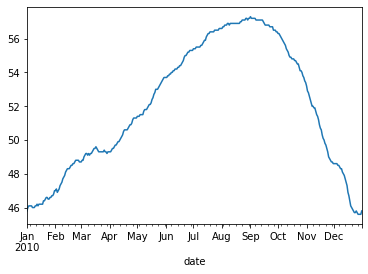

In [9]:
day_min_temp.temp.plot()
plt.show()

---

3. Write the code necessary to visualize the maximum temperature over time.

In [10]:
day_max_temp = df.resample('d').max()
day_max_temp.head()

,temp
date,
2010-01-01,53.3
2010-01-02,53.4
2010-01-03,53.5
2010-01-04,53.6
2010-01-05,53.8


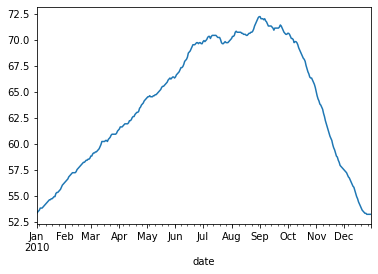

In [11]:
day_max_temp.temp.plot()
plt.show()

---

4. Which month is the coldest, on average?

In [13]:
month_avg_temp = df.resample('m').mean()
month_avg_temp.head()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968


In [19]:
month_avg_temp.temp.idxmin().month_name()

'January'

---

5. Which month has the highest average temperature?

In [21]:
month_avg_temp.temp.idxmax().month_name()

'September'

---

5. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [27]:
day_min_max = df.resample('d').agg(['min', 'max'])
day_min_max.head()

temp    
            min max
date               
2010-01-01   45  53
2010-01-02   46  53
2010-01-03   46  53
2010-01-04   46  53
2010-01-05   46  53

In [34]:
day_min_max.columns

MultiIndex([('temp', 'min'),
            ('temp', 'max')],
           )

In [37]:
day_min_max['temp_var'] = day_min_max['temp']['max'] - day_min_max['temp']['min']

In [38]:
day_min_max.head()

temp     temp_var
            min max         
date                        
2010-01-01   45  53        8
2010-01-02   46  53        7
2010-01-03   46  53        7
2010-01-04   46  53        7
2010-01-05   46  53        7

In [40]:
day_min_max.temp_var.idxmax().month_name()

'June'

---

**Bonus:** Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

---

### Seattle Weather Data

In [41]:
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [43]:
df = df.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


---

1. Which year and month combination has the highest amount of precipitation?

In [56]:
df.precipitation.idxmax()

Timestamp('2015-03-15 00:00:00')

In [51]:
type(df.precipitation.idxmax())

pandas._libs.tslibs.timestamps.Timestamp

In [55]:
df.precipitation.idxmax().strftime('%B, %Y')

'March, 2015'

---

2. Visualize the amount of monthly precipitation over time

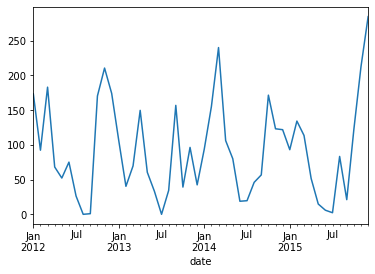

In [57]:
month_precip = df.resample('m').sum()
month_precip.precipitation.plot()
plt.show()

---

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate

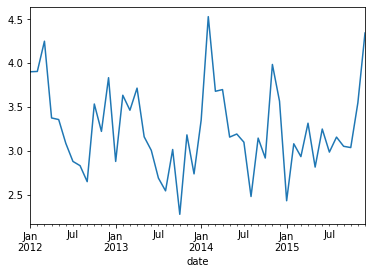

In [58]:
month_wind = df.resample('m').mean()
month_wind.wind.plot()
plt.show()

---

4. Which year-month combination is the windiest?

In [62]:
month_wind.wind.idxmax()

Timestamp('2014-02-28 00:00:00', freq='M')

In [61]:
month_wind.wind.idxmax().strftime('%Y, %B')

'2014, February'

---

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [63]:
df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [75]:
year_weather = df.resample('y').weather.value_counts()

In [77]:
year_weather

date        weather
2012-12-31  rain       191
            sun        118
            drizzle     31
            snow        21
            fog          5
2013-12-31  sun        205
            fog         82
            rain        60
            drizzle     16
            snow         2
2014-12-31  sun        211
            fog        151
            rain         3
2015-12-31  sun        180
            fog        173
            drizzle      7
            rain         5
Name: weather, dtype: int64

In [79]:
type(year_weather)

pandas.core.series.Series

In [90]:
year_weather = year_weather.unstack()

In [91]:
year_weather

weather,drizzle,fog,rain,snow,sun
date,,,,,
2012-12-31,31.0,5.0,191.0,21.0,118.0
2013-12-31,16.0,82.0,60.0,2.0,205.0
2014-12-31,NaN,151.0,3.0,NaN,211.0
2015-12-31,7.0,173.0,5.0,NaN,180.0


In [93]:
type(year_weather)

pandas.core.frame.DataFrame

In [94]:
year_weather.sun.idxmax().strftime('%Y')

'2014'

---

6. In which month does it rain the most?

In [95]:
month_rain = df.resample('m').sum()
month_rain

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-31,173.3,218.7,47.8,120.9
2012-02-29,92.3,269.0,92.9,113.2
2012-03-31,183.0,296.2,88.0,131.7
2012-04-30,68.1,446.2,179.8,101.2
2012-05-31,52.2,547.5,253.9,104.0
2012-06-30,75.1,560.8,314.4,92.5
2012-07-31,26.3,710.1,400.9,89.2
2012-08-31,0.0,801.6,434.3,87.7
2012-09-30,0.9,686.4,337.3,79.4


In [100]:
month_rain['month'] = month_rain.index.strftime('%B')
month_rain.head()

,precipitation,temp_max,temp_min,wind,month
date,,,,,
2012-01-31,173.3,218.7,47.8,120.9,January
2012-02-29,92.3,269.0,92.9,113.2,February
2012-03-31,183.0,296.2,88.0,131.7,March
2012-04-30,68.1,446.2,179.8,101.2,April
2012-05-31,52.2,547.5,253.9,104.0,May


In [104]:
month_rain.groupby('month').sum().sort_values(by='precipitation', ascending=False)

,precipitation,temp_max,temp_min,wind
month,,,,
November,642.5,1322.8,564.2,417.9
December,622.7,1016.1,412.3,448.7
March,606.2,1536.0,602.5,443.9
October,503.4,2032.3,1159.5,364.5
January,466.0,1020.4,334.4,389.2
February,422.0,1114.2,458.2,427.9
April,375.4,1802.4,763.5,422.9
September,235.5,2630.9,1483.0,355.6
May,207.5,2392.7,1192.2,386.9


In [106]:
month_rain.groupby('month').sum().precipitation.nlargest(n=1)

month
November    642.5
Name: precipitation, dtype: float64

---

7. Which month has the most number of days with a non-zero amount of precipitation?

In [107]:
df.precipitation.value_counts()

0.0     838
0.3      54
0.5      40
1.0      26
1.5      25
       ... 
30.0      1
26.4      1
19.1      1
46.7      1
21.8      1
Name: precipitation, Length: 111, dtype: int64

---

### Flights Dataset

In [ ]:
#df = data.flights_20k()